# Open Ocean
# Open Earth Fundation
---------------------------------------------------------------------------------------------------------------------
Authors: Margaux Filippi & Maureen Fonseca

---------------------------------------------------------------------------------------------------------------------

<h1> Step 2: calculate different metrics for each modulating factor </h1>
    
This notebook is the second part of the Step1_Curate_IUCN_RedList.ipynb

<h2> Modulating Factor 3: Species Distribution Area  <h2>

<h2> Data needed for this project </h2>

The data was output by `Step1_Curate_IUCN_RedList.ipynb` and can be found under [IUCN_RedList](https://drive.google.com/drive/folders/1waEAtfQwErhBKH3GkTHZXIlbadzH3HYu?usp=share_link) under a temporary folder that accompagnies the GitHub repository: 

`Ocean Program > data > data_processed > ACMC_IUCN_RedList`

### Analyzing UICN data for marine species in the Eastern Tropical Pacific.

In [1]:
import geopandas as gpd

/Users/maureenfonseca/opt/anaconda3/lib/python3.9/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [2]:
import numpy as np
import pandas as pd

In [3]:
import os
import glob

In [4]:
from shapely.geometry import Polygon, Point

In [5]:
import fiona; #help(fiona.open)

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
import timeit

In [129]:
from netCDF4 import Dataset
import cmocean
import geopandas as gpd
from matplotlib.ticker import LinearLocator
from mpl_toolkits.axes_grid1 import make_axes_locatable

OEF functions

In [8]:
from marinebiodiversity_utils import *

<h1> 2.1. Load data </h1>

<h2> 2.1.1 Get the conservation area</h2>

Mostly for plotting.

<h3> Coordinates for Cocos Island </h3>

Cocos Island is located at 05°31′41″N; 87°03′40″W

In [9]:
Cocos_lat = 5+31/60+41/3600
Cocos_lon = -(87+3/60+40/3600)
Cocos = Point(Cocos_lon, Cocos_lat)

<h3> Import entire AMMB and PNIC </h3>

In [10]:
ACMC = gpd.read_file('../../Geospatial_ACMC/ACMC.shp')
AMMB = gpd.read_file('../../Geospatial_ACMC/AMMB.shp')
PNIC = gpd.read_file('../../Geospatial_ACMC/PNIC.shp')

Inspect the Coordinate Reference Systems (CRS).

In [11]:
AMMB.crs

<Derived Projected CRS: EPSG:5367>
Name: CR05 / CRTM05
Axis Info [cartesian]:
- N[north]: Northing (metre)
- E[east]: Easting (metre)
Area of Use:
- name: Costa Rica - onshore and offshore east of 86°30'W.
- bounds: (-86.5, 2.21, -81.43, 11.77)
Coordinate Operation:
- name: Costa Rica TM 2005
- method: Transverse Mercator
Datum: Costa Rica 2005
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [12]:
PNIC.crs

<Derived Projected CRS: EPSG:5367>
Name: CR05 / CRTM05
Axis Info [cartesian]:
- N[north]: Northing (metre)
- E[east]: Easting (metre)
Area of Use:
- name: Costa Rica - onshore and offshore east of 86°30'W.
- bounds: (-86.5, 2.21, -81.43, 11.77)
Coordinate Operation:
- name: Costa Rica TM 2005
- method: Transverse Mercator
Datum: Costa Rica 2005
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [13]:
AMMB_WGS84 = AMMB.to_crs(crs=4326)
PNIC_WGS84 = PNIC.to_crs(crs=4326)
ACMC = ACMC.set_crs(epsg=4326, allow_override=True)

In [14]:
ACMC['area']

0    1.062837e+07
Name: area, dtype: float64

Get area information.

In [15]:
print("Area, PNIC:")
print("{:0.2f}".format(PNIC_WGS84.area.item()) + " sqdeg.")
print("{:,.2f}".format(PNIC_WGS84.to_crs(crs=31970).area.item()*10**(-6)) + " sqkm in CRS 31970.")

print("\nArea, AMMB:")
print("{:0.2f}".format(AMMB_WGS84.area.item()) + " sqdeg.")
print("{:,.2f}".format(AMMB_WGS84.to_crs(crs=31970).area.item()*10**(-6)) + " sqkm in CRS 31970.")

print("\nTotal Area, ACMC:")
print("{:0.2f}".format(AMMB_WGS84.area.item() + PNIC_WGS84.area.item()) + " sqdeg.")
print("{:,.2f}".format(AMMB_WGS84.to_crs(crs=31970).area.item()*10**(-6) + PNIC_WGS84.to_crs(crs=31970).area.item()*10**(-6)) + " sqkm in CRS 31970.")

Area, PNIC:
4.47 sqdeg.
54,799.50 sqkm in CRS 31970.

Area, AMMB:
8.66 sqdeg.
106,243.90 sqkm in CRS 31970.

Total Area, ACMC:
13.13 sqdeg.
161,043.41 sqkm in CRS 31970.


/var/folders/v8/b0fnjf9d4q31sfz_8q4h4zxm0000gn/T/ipykernel_9053/2915868912.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  print("{:0.2f}".format(PNIC_WGS84.area.item()) + " sqdeg.")
/var/folders/v8/b0fnjf9d4q31sfz_8q4h4zxm0000gn/T/ipykernel_9053/2915868912.py:6: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  print("{:0.2f}".format(AMMB_WGS84.area.item()) + " sqdeg.")
/var/folders/v8/b0fnjf9d4q31sfz_8q4h4zxm0000gn/T/ipykernel_9053/2915868912.py:10: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  print("{:0.2f}".format(AMMB_WGS84.area.item() + PNIC_WGS84.area.item()) + " sqdeg.")


<h2> 2.1.2 Get the species data </h2>

This is the outcome from `Step1_Curate_IUCN_RedList.ipynb`.

In [16]:
df = gpd.read_file('../../ACMC_IUCN_data/gdf_ACMC_IUCN_range_status_filtered.shp') 

In [17]:
df.head()

,index,ASSESSMENT,ID_NO,BINOMIAL,PRESENCE,ORIGIN,SEASONAL,COMPILER,YEAR,CITATION,LEGEND,SUBSPECIES,SUBPOP,DIST_COMM,ISLAND,TAX_COMM,redlistCat,scientific,geometry
0,3,1506081,177969.0,Acanthurus nigricans,1,1,1,Jonnell Sanciangco,2010,International Union for Conservation of Nature...,Extant (resident),None,None,None,None,None,Least Concern,Acanthurus nigricans,"MULTIPOLYGON (((109.79501 6.13966, 109.89836 6..."
1,10,1512439,177988.0,Naso annulatus,1,1,1,Jonnell Sanciangco,2010,International Union for Conservation of Nature...,Extant (resident),None,None,None,None,None,Least Concern,Naso annulatus,"MULTIPOLYGON (((109.79501 6.13966, 109.89836 6..."
2,13,1517273,178002.0,Naso hexacanthus,1,1,1,Jonnell Sanciangco,2010,International Union for Conservation of Nature...,Extant (resident),None,None,None,None,None,Least Concern,Naso hexacanthus,"MULTIPOLYGON (((99.07516 7.94581, 99.07794 7.9..."
3,97,2412930,195754.0,Gymnothorax meleagris,1,1,1,IUCN Marine Biodiversity Unit/GMSA,2018,IUCN Marine Biodiversity Unit/GMSA,Extant (resident),None,None,None,None,None,Least Concern,Gymnothorax meleagris,"MULTIPOLYGON (((144.23853 -3.82053, 144.24330 ..."
4,102,2423479,195824.0,Uropterygius macrocephalus,1,1,1,IUCN Marine Biodiversity Unit/GMSA,2018,IUCN Marine Biodiversity Unit/GMSA,Extant (resident),None,None,None,None,None,Least Concern,Uropterygius macrocephalus,"MULTIPOLYGON (((144.23853 -3.82053, 144.24330 ..."


With the first version data from Margaux, the data set had 164 unique species, now:

In [20]:
print("There are " + str(len(df)) + " unique species in this dataset.")

There are 640 unique species in this dataset.


<h1> 2.2. Preliminary calculations </h1> 

In [27]:
area_of_conservation = ACMC.geometry.item()

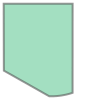

In [28]:
area_of_conservation

Let's to define a generic distribution ratio based on the total conservation area (ACMC's area) and the total distribution area for each species:

DistRatio 1 = $\frac{\text{total conservation area}}{\text{distribution area}}$

## 2.2.1 Analysis - Scenarios

1. `DistRatio 1 > 1` 

`Total conservation area > Distribution area`

This means that: 1. those species can be endemic of ACMC or another site of the Eastern Tropical Pacific, 2. those species have lack spatial information.

2. `DistRatio 1 = 1`

Those species have the same number of distribution area that ACMC

3. `DistRatio 1 < 1`

`Total conservation area < Distribution area`

Those species have a high spatial coverage and they could be migratory species or global species.

In [29]:
df['area'] = df.area
df["DistRatio"] = area_of_conservation.area/df.area
df["DistFactorPerc"] = 100*df.DistRatio
df.head().DistRatio

0    0.009522
1    0.009188
2    0.008233
3    0.009871
4    0.012679
Name: DistRatio, dtype: float64

<AxesSubplot:>

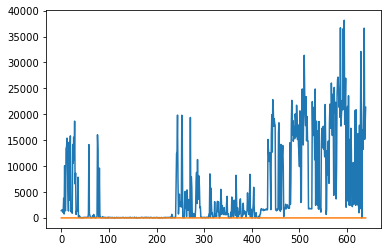

In [116]:
df.geometry.area.plot()
df.DistRatio.plot()

Let's to look more close the Distribution Ratio plot:

<AxesSubplot:>

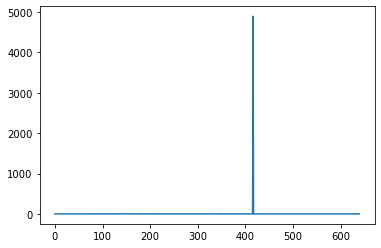

In [31]:
df.DistRatio.plot()

That maximum value are wrong. The dataset needs to be cleaned.

But first, let's to know which species is and its location in our dataset

In [32]:
print('The species is: '+str(df.BINOMIAL[np.where(df.DistRatio == df.DistRatio.max())[0]]))

The species is: 416    Sicydium cocoense
Name: BINOMIAL, dtype: object


The distribution area of the Sicydium cocoense looks like:

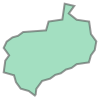

In [33]:
df.loc[416].geometry

TypeError: no numeric data to plot

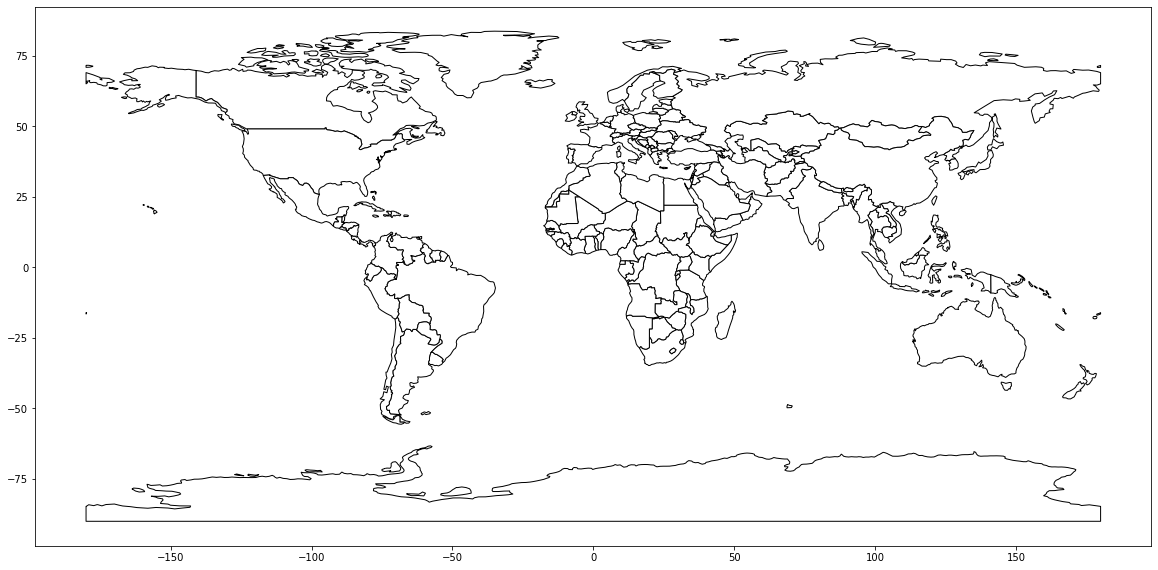

In [34]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
fig, ax = plt.subplots(figsize=(20,10))

ax.set_aspect('equal')

world.plot(ax=ax, color='white', edgecolor='black')


# ax.scatter(Cocos.x, Cocos.y, c = 'r')
#df[df.DistRatio2==np.max(df.DistRatio2)].plot(ax = ax, color = 'r', alpha = 0.25)
df.loc[416].plot(ax = ax, color = 'r', alpha = 0.25)

AMMB_WGS84.plot(ax=ax, alpha = 0.15, color = 'purple', edgecolor='black')

PNIC_WGS84.plot(ax=ax, alpha = 0.15, color = 'teal', edgecolor='black')#, marker='o', color='red', markersize=5)

ax.set_xlim((-90, -85))
ax.set_ylim((2, 7))
plt.show();

The row 416 is corrupted

In [35]:
df.DistRatio.loc[df['DistRatio'] == df.DistRatio.max()] = np.nan

/var/folders/v8/b0fnjf9d4q31sfz_8q4h4zxm0000gn/T/ipykernel_9053/1941760758.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.DistRatio.loc[df['DistRatio'] == df.DistRatio.max()] = np.nan


Let's to plot again distribution ratio:

Text(0.5, 1.0, 'Plot 2: Distribution Ratio 1')

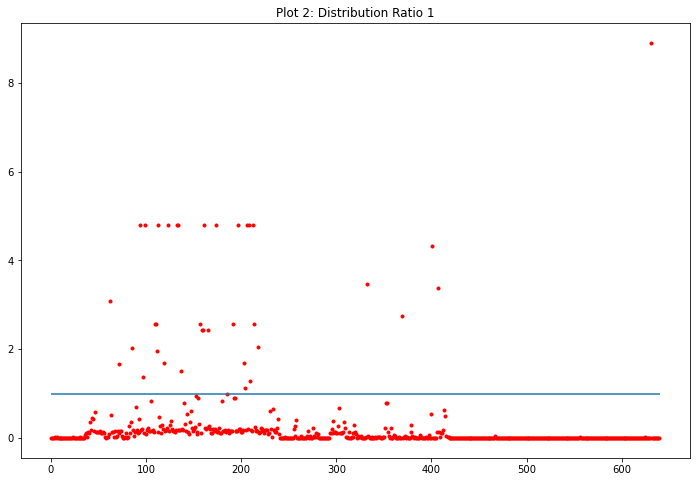

In [48]:
plt.figure(figsize=(12,8))
plt.plot(df.DistRatio,'.r')
plt.hlines(y=1,xmin=0, xmax=640)
plt.title('Plot 2: Distribution Ratio 1')

Text(0.5, 1.0, 'Plot 3: Histogram of Distribution Ratio 1')

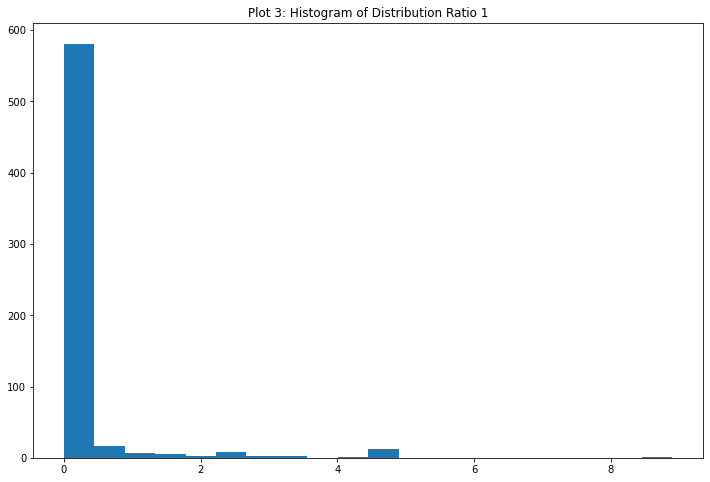

In [55]:
plt.figure(figsize=(12,8))
plt.hist(df.DistRatio,bins=20)
plt.title('Plot 3: Histogram of Distribution Ratio 1')

The plot 3 shows us that we have several species where:

`area of conservation > area of distribution`

then,

`Distribution Ratio 1 > 1`

It means that there are species that have their `area of distribution` smallest than the `are of conservation`

But, those areas are only numbers, that species can be endemic in other part of the world.

In addition, it must be taken into account that there may be a lack of information on the distribution of many species.

For example, if they have a small distribution area, it does not imply that they are not in other parts of the world. So it is important to double check what species they are and if the information is correct with reality.

Otherwise, if:

`area of conservation < area of its distribution`

then,

`Distribution Ratio 1 < 1`

It means that the area of distribution of that species is biggest than the value of the area of ACMC, so it's less probable those species are endemic of ACMC 

Also, when `Distribution ratio << 1`

It means that those species have a high spatial coverage and they could be migratory species or global species.

------------------------------------------------------------------------------------------------------------
Here, we have a test about the results obtained for Margaux with a old data set and our currently results.

I'm not sure if that value correspond to the same species.

In [49]:
df.loc[[110, 153, 157, 86, 87]].DistRatio

110    2.562393
153    0.142533
157    2.562393
86     0.173024
87     0.050969
Name: DistRatio, dtype: float64

Note:
`df.loc[[110, 153, 157, 86, 87]].DistRatio`
shows
```
110    0.000358
153    0.000409
157    0.000998
86     0.001967
87     0.000718
Name: DistRatio, dtype: float64
```
and
`AMMB_IUCN_df1.head().DistRatio`
showed
```
110    0.000358
153    0.000409
157    0.000998
86     0.001967
87     0.000718
Name: DistRatio, dtype: float64
```

To be honest, I'm not sure which road to take. 
- the conservation area (ACMC) is HUGE compared to the range of the sawfish
- but within ACMC, the sawfish is not widely distributed.
- vice-versa for the ray

On the other hand:
- the region around ACMC seem way more critical for the sawfish than the ray: see how distributed the ray is?
- the conservation for the milkfish is diminished compared to the orca.

so perhaps the first route was the "right" one?

We need some post-processing, e.g. smoothing, clustering, etc.

In [ ]:
def get_DistRatioFactor_invsquare(DistRatio, print_out = False):
    # This function calculates the weighted endemism of species by taking the sum of the 
    # squares of the ratios of (area conserved / total distribution area)
    #
    # Input arguments:
    #      DistRatio: a series of the area conserved / total distribution area ratio for each species
    #      print_out: a boolean for printing out the factor
    #
    # Output:
    #      factor: the factor of weighted endemism
    
    factor = 1+sum(DistRatio**2)
    if print_out:
        print("We multiply N credits by " + "{:0.3f}".format(factor))
    return factor

What are the credits based on DistRatio1?

In [ ]:
example_credits(area_of_conservation.area, df_nonan.DistRatio, get_DistRatioFactor);
example_credits(111.1**(-2), df_nonan.DistRatio, get_DistRatioFactor);

example_credits(area_of_conservation.area, df_nonan.DistRatio, get_DistRatioFactor_square);
example_credits(111.1**(-2), df_nonan.DistRatio, get_DistRatioFactor_square);

Okay clearly these numbers get wild.

To be completed!

**Notes**

1. In those approaches, I'm not consider each sqkm, it's more general for the whole ACMC area.